In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [5]:
df = pd.read_csv("FEV-data.csv")
df.head()  # Display first 5 rows


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range
of 400 km.
a) Your task is to filter out EVs that meet these criteria.
b) Group them by the manufacturer (Make).
c) Calculate the average battery capacity for each manufacturer.

In [6]:
# Filtering EVs
filtered_cars = df[(df["Minimal price (gross) [PLN]"] <= 350000) & (df["Range (WLTP) [km]"] >= 400)]

# Grouping by manufacturer and calculating average battery capacity
avg_battery_capacity = filtered_cars.groupby("Make")["Battery capacity [kWh]"].mean()

print("Filtered EVs:")
print(filtered_cars[["Make", "Model", "Minimal price (gross) [PLN]", "Range (WLTP) [km]"]])

print("\nAverage Battery Capacity by Manufacturer:")
print(avg_battery_capacity)


Filtered EVs:
             Make                        Model  Minimal price (gross) [PLN]  \
0            Audi            e-tron 55 quattro                       345700   
8             BMW                          iX3                       282900   
15        Hyundai          Kona electric 64kWh                       178400   
18            Kia                 e-Niro 64kWh                       167990   
20            Kia                 e-Soul 64kWh                       160990   
22  Mercedes-Benz                          EQC                       334700   
39          Tesla  Model 3 Standard Range Plus                       195490   
40          Tesla           Model 3 Long Range                       235490   
41          Tesla          Model 3 Performance                       260490   
47     Volkswagen         ID.3 Pro Performance                       155890   
48     Volkswagen                   ID.3 Pro S                       179990   
49     Volkswagen                     

Task 2: You suspect some EVs have unusually high or low energy consumption. Find the
outliers in the mean - Energy consumption [kWh/100 km] column.

In [10]:
# Calculate mean and standard deviation
mean_value = df["mean - Energy consumption [kWh/100 km]"].mean()
std_dev = df["mean - Energy consumption [kWh/100 km]"].std()

# Define outlier range
lower_bound = mean_value - (2 * std_dev)
upper_bound = mean_value + (2 * std_dev)

# Find outliers
outliers_std = df[(df["mean - Energy consumption [kWh/100 km]"] < lower_bound) | 
                  (df["mean - Energy consumption [kWh/100 km]"] > upper_bound)]

print("Outliers using Standard Deviation:")
print(outliers_std[["Make", "Model", "mean - Energy consumption [kWh/100 km]"]])



Outliers using Standard Deviation:
             Make       Model  mean - Energy consumption [kWh/100 km]
51  Mercedes-Benz  EQV (long)                                    28.2


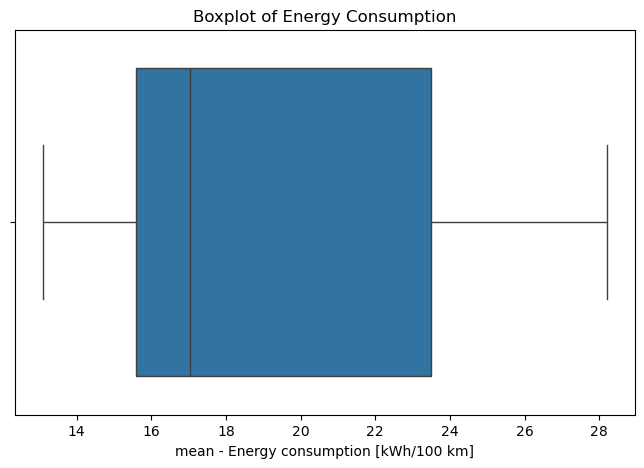

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["mean - Energy consumption [kWh/100 km]"])
plt.title("Boxplot of Energy Consumption")
plt.show()


Task 3: Your manager wants to know if there's a strong relationship between battery
capacity and range.
a) Create a suitable plot to visualize.
b) Highlight any insights.

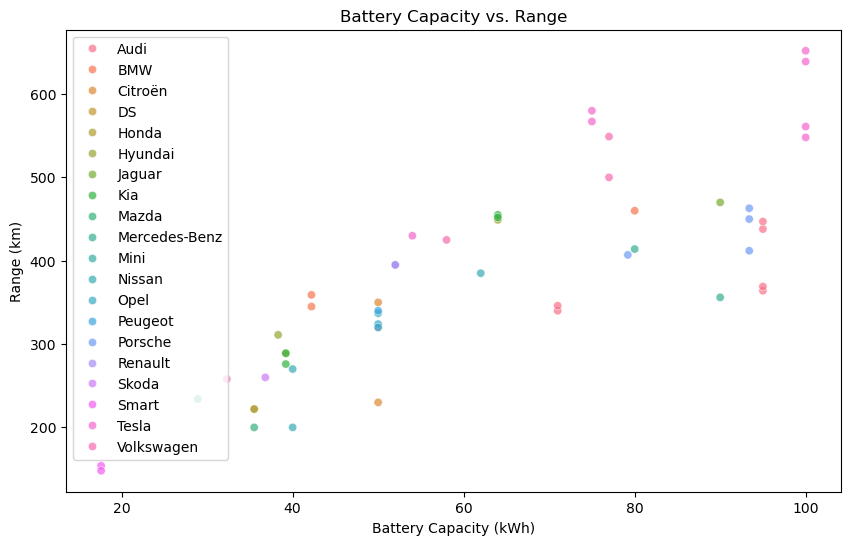

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Battery capacity [kWh]", y="Range (WLTP) [km]", hue="Make", alpha=0.7)
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.title("Battery Capacity vs. Range")
plt.legend(loc="best")
plt.show()


Task 4: Build an EV recommendation class. The class should allow users to input their
budget, desired range, and battery capacity. The class should then return the top three EVs
matching their criteria. 

In [14]:
class EVRecommender:
    def __init__(self, df):
        self.df = df
    
    def recommend(self, budget, min_range, min_battery):
        recommendations = self.df[
            (self.df["Minimal price (gross) [PLN]"] <= budget) & 
            (self.df["Range (WLTP) [km]"] >= min_range) & 
            (self.df["Battery capacity [kWh]"] >= min_battery)
        ]
        return recommendations[["Make", "Model", "Minimal price (gross) [PLN]", "Range (WLTP) [km]", "Battery capacity [kWh]"]].head(3)

# Example usage
recommender = EVRecommender(df)
budget = 350000
range_needed = 400
battery_needed = 60

print("Top EV Recommendations:")
print(recommender.recommend(budget, range_needed, battery_needed))


Top EV Recommendations:
       Make                Model  Minimal price (gross) [PLN]  \
0      Audi    e-tron 55 quattro                       345700   
8       BMW                  iX3                       282900   
15  Hyundai  Kona electric 64kWh                       178400   

    Range (WLTP) [km]  Battery capacity [kWh]  
0                 438                    95.0  
8                 460                    80.0  
15                449                    64.0  


Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant
difference in the average Engine power [KM] of vehicles manufactured by two leading
manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?
Recommendations and Conclusion: Provide actionable insights based on your analysis.
(Conduct a two sample t-test using ttest_ind from scipy.stats module) 

In [15]:
tesla_power = df[df["Make"] == "Tesla"]["Engine power [KM]"]
audi_power = df[df["Make"] == "Audi"]["Engine power [KM]"]

# Perform two-sample t-test
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in engine power between Tesla and Audi.")
else:
    print("No significant difference in engine power between Tesla and Audi.")


T-Statistic: 1.7939951827297178
P-Value: 0.10684105068839565
No significant difference in engine power between Tesla and Audi.


task 6: video 

link:https://drive.google.com/file/d/1JwHvkaJal2MV9jyNZpB0iLHC22yn5hOc/view?usp=sharing
